In [2]:
#importing the libraries 

#PyTorch Library
import torch 

#PyTorch Neural Network
import torch.nn as nn

#to transform data
import torchvision.transforms as transforms

#to get the digit dataset
import torchvision.datasets as dsets

#to create graphs
import matplotlib.pylab as plt

#to use arrays to manipulate and store data
import numpy as np

In [ ]:
#function to plot the parameters of the softmax function

def PlotParameters(model): 
    W = model.state_dict()['linear.weight'].data
    w_min = W.min().item()
    w_max = W.max().item()
    fig, axes = plt.subplots(2, 5)
    fig.subplots_adjust(hspace=0.01, wspace=0.1)
    for i, ax in enumerate(axes.flat):
        if i < 10:
            
            #set the label for the sub-plot.
            ax.set_xlabel("class: {0}".format(i))

            #plot the image.
            ax.imshow(W[i, :].view(28, 28), vmin=w_min, vmax=w_max, cmap='seismic')

            ax.set_xticks([])
            ax.set_yticks([])

        
        
    plt.show()

In [3]:
#visualize data

def show_data(data_sample):
    plt.imshow(data_sample[0].numpy().reshape(28, 28), cmap='gray')
    plt.title('y = ' + str(data_sample[1]))


In [6]:
#create and print the training dataset

train_dataset = dsets.MNIST(root='/Users/hemand', train=True, download=True, transform=transforms.ToTensor())
print("Print the training dataset:\n ", train_dataset)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:03<00:00, 3123503.21it/s]


Extracting /Users/hemand/MNIST/raw/train-images-idx3-ubyte.gz to /Users/hemand/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 117053.79it/s]


Extracting /Users/hemand/MNIST/raw/train-labels-idx1-ubyte.gz to /Users/hemand/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1110063.39it/s]


Extracting /Users/hemand/MNIST/raw/t10k-images-idx3-ubyte.gz to /Users/hemand/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 2348727.50it/s]

Extracting /Users/hemand/MNIST/raw/t10k-labels-idx1-ubyte.gz to /Users/hemand/MNIST/raw

Print the training dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/hemand
    Split: Train
    StandardTransform
Transform: ToTensor()


In [8]:
#create and print the validation dataset
#load the training dataset by setting the parameters train to True and convert it into a tensor by placing a transform object in the argument transform

validation_dataset = dsets.MNIST(root='/Users/hemand', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/hemand
    Split: Train
    StandardTransform
Transform: ToTensor()


In [9]:
#create and print the validation dataset
#load the testing dataset and convert into a tensor by placing object in arg transform
validation_dataset = dsets.MNIST(root='/Users/hemand', download=True, transform=transforms.ToTensor())
print("Print the validation dataset:\n ", validation_dataset)

Print the validation dataset:
  Dataset MNIST
    Number of datapoints: 60000
    Root location: /Users/hemand
    Split: Train
    StandardTransform
Transform: ToTensor()


First Image and Label


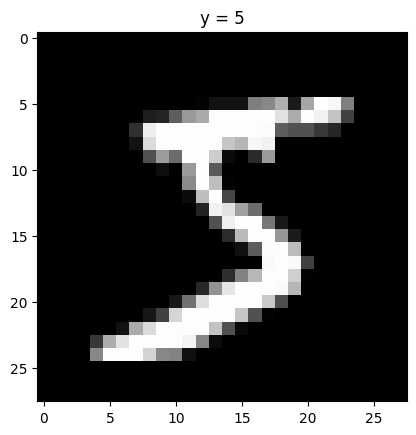

In [14]:
#print the first image and label

print("First Image and Label") 
show_data(train_dataset[0])  


In [22]:
#print the label
print("The label: ", train_dataset[0][1])

The label:  5


The image: 


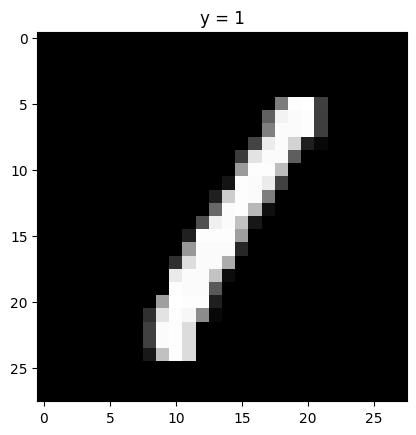

In [25]:
#plot the 4th sample
print("The image: ")
show_data(train_dataset[3])

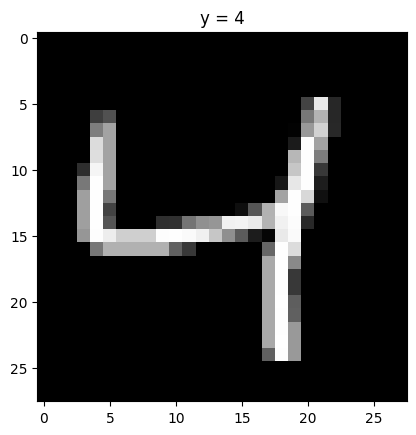

In [26]:
# Plot the image
show_data(train_dataset[2])

In [27]:
#building a softmax classifier
#define softmax classifier class

class SoftMax(nn.Module):
    
    #constructor
    def __init__(self, input_size, output_size):
        super(SoftMax, self).__init__()
        #creates a layer of given input size and output size
        self.linear = nn.Linear(input_size, output_size)
        
    # Prediction
    def forward(self, x):
        #runs the x value through the single layers defined above
        z = self.linear(x)
        return z

In [28]:
#print the shape of the training dataset
train_dataset[0][0].shape

torch.Size([1, 28, 28])

In [29]:
#set input size and output size

input_dim = 28 * 28
output_dim = 10

In [30]:
#creating the model
#input dim is 28*28 which is the image converted to a tensor
#output dim is 10 because there are 10 possible digits the image can be
model = SoftMax(input_dim, output_dim)
print("Print the model:\n ", model)

Print the model:
  SoftMax(
  (linear): Linear(in_features=784, out_features=10, bias=True)
)


In [31]:
#print the parameters
print('W: ',list(model.parameters())[0].size())
print('b: ',list(model.parameters())[1].size())

W:  torch.Size([10, 784])
b:  torch.Size([10])


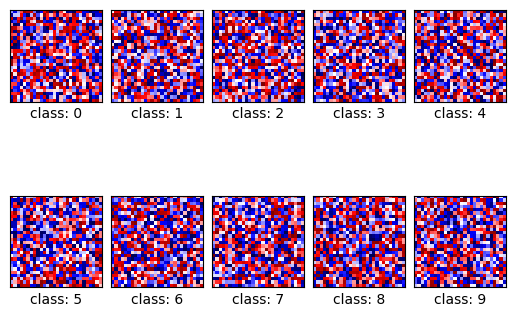

In [32]:
#plot the model parameters for each class
PlotParameters(model)

In [33]:
#making a prediction
#get the X value of the first image
X = train_dataset[0][0]
#the shape is 1 by 28 by 28, flatten it to 1 by 28 * 28 (784)
print(X.shape)
X = X.view(-1, 28*28)
print(X.shape)
#make a prediction, each class has a value, higher it is the more confident the model is that it is that digit
model(X)

torch.Size([1, 28, 28])
torch.Size([1, 784])


tensor([[ 0.2622, -0.1395,  0.1256, -0.0848, -0.1541,  0.0255, -0.3327, -0.0636,
         -0.1257, -0.3515]], grad_fn=<AddmmBackward0>)

In [34]:
#define the learning rate, optimizer, criterion, and data loader
learning_rate = 0.1
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
criterion = nn.CrossEntropyLoss()
#created a training data loader so we can set the batch size
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=100)
#created a validation data loader so we can set the batch size
validation_loader = torch.utils.data.DataLoader(dataset=validation_dataset, batch_size=5000)

Output:  tensor([[ 0.2622, -0.1395,  0.1256, -0.0848, -0.1541,  0.0255, -0.3327, -0.0636,
         -0.1257, -0.3515]], grad_fn=<AddmmBackward0>)
Actual: tensor([5])
tensor([[0.1391, 0.0931, 0.1213, 0.0983, 0.0917, 0.1098, 0.0767, 0.1004, 0.0944,
         0.0753]], grad_fn=<SoftmaxBackward0>)


tensor([2.2094], grad_fn=<MulBackward0>)

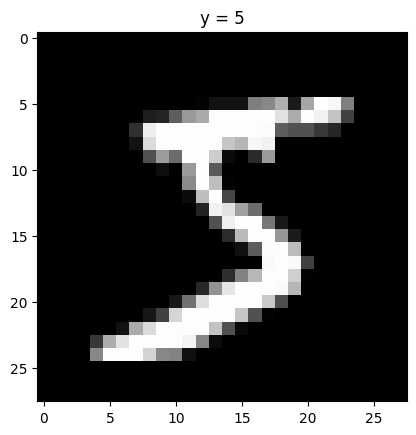

In [35]:
model_output = model(X)
actual = torch.tensor([train_dataset[0][1]])

show_data(train_dataset[0])
print("Output: ", model_output)
print("Actual:", actual)
criterion(model_output, actual)
softmax = nn.Softmax(dim=1)
probability = softmax(model_output)
print(probability)
-1*torch.log(probability[0][actual])

In [36]:
#training phase


n_epochs = 10
#lists to keep track of loss and accuracy
loss_list = []
accuracy_list = []
#size of the validation data
N_test = len(validation_dataset)

#function to train the model based on number of epochs
def train_model(n_epochs):
    #loops n_epochs times
    for epoch in range(n_epochs):
        #for each batch in the train loader
        for x, y in train_loader:
            #resets the calculated gradient value, this must be done each time as it accumulates if dont reset
            optimizer.zero_grad()
            #makes a prediction based on the image tensor
            z = model(x.view(-1, 28 * 28))
            #calculates loss between the model output and actual class
            loss = criterion(z, y)
            #calculates the gradient value with respect to each weight and bias
            loss.backward()
            #updates the weight and bias according to calculated gradient value
            optimizer.step()
        
        #each epoch we check how the model performs with data 
        correct = 0
        #for each batch in the validation loader
        for x_test, y_test in validation_loader:
            #makes prediction based on image tensor
            z = model(x_test.view(-1, 28 * 28))
            #finds the class with the higest output
            _, yhat = torch.max(z.data, 1)
            #checks if the prediction matches the actual class and increments correct if it does
            correct += (yhat == y_test).sum().item()
        #calculates the accuracy by dividing correct by size of validation dataset
        accuracy = correct / N_test
        #keeps track loss
        loss_list.append(loss.data)
        #keeps track of the accuracy
        accuracy_list.append(accuracy)

#function call
train_model(n_epochs)

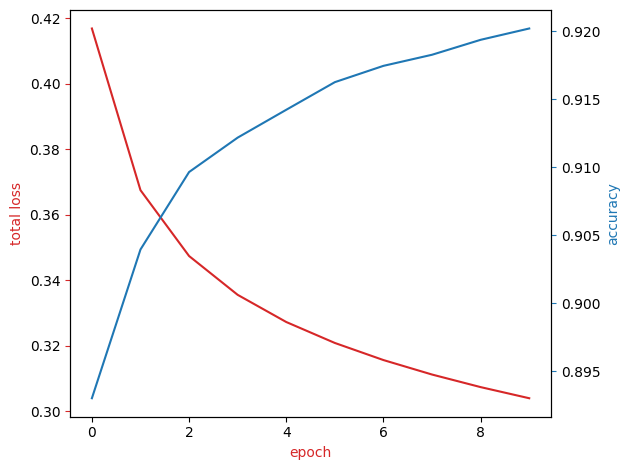

In [37]:
#analyzing results
fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.plot(loss_list,color=color)
ax1.set_xlabel('epoch',color=color)
ax1.set_ylabel('total loss',color=color)
ax1.tick_params(axis='y', color=color)
    
ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('accuracy', color=color)  
ax2.plot( accuracy_list, color=color)
ax2.tick_params(axis='y', color=color)
fig.tight_layout()

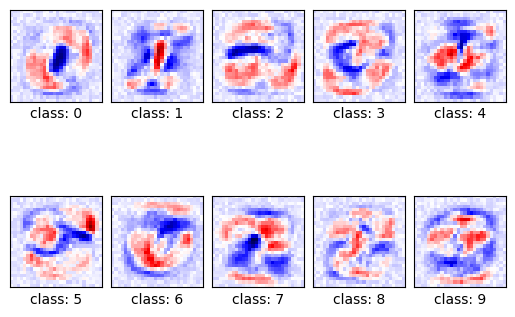

In [38]:
#plot the parameters
PlotParameters(model)

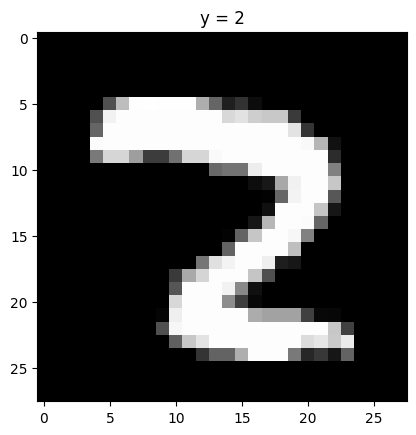

yhat: tensor([7])
probability of class  0.6520592570304871


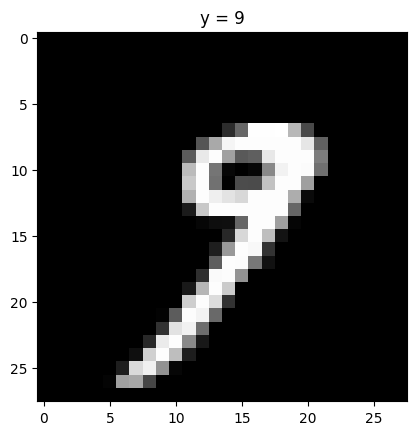

yhat: tensor([7])
probability of class  0.7139247059822083


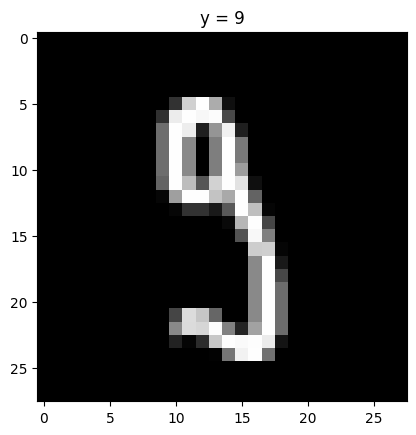

yhat: tensor([5])
probability of class  0.7271707057952881


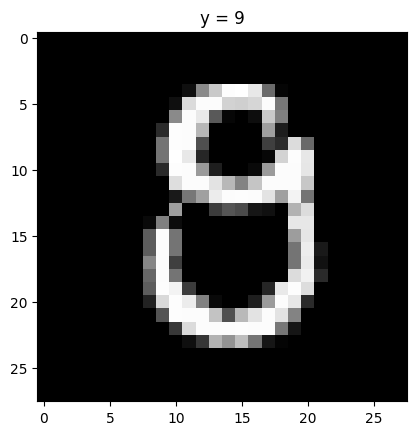

yhat: tensor([8])
probability of class  0.37471139430999756


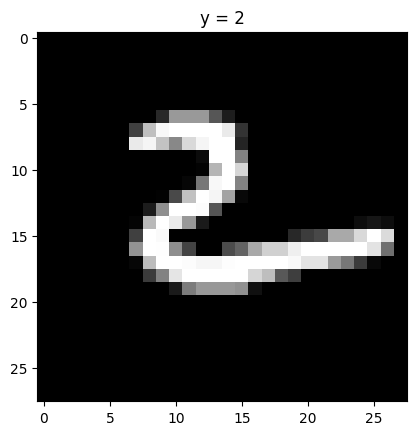

yhat: tensor([6])
probability of class  0.5146496295928955


In [39]:
#plotting the first five misclassified samples and the probabilty of that class
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat != y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break       

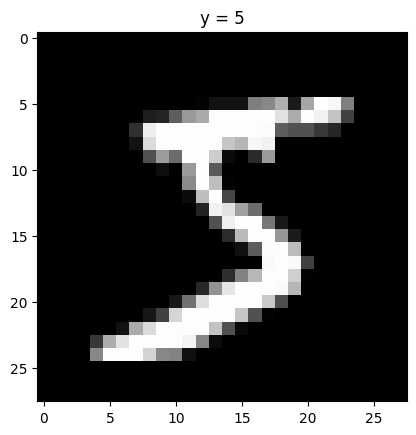

yhat: tensor([5])
probability of class  0.8476642370223999


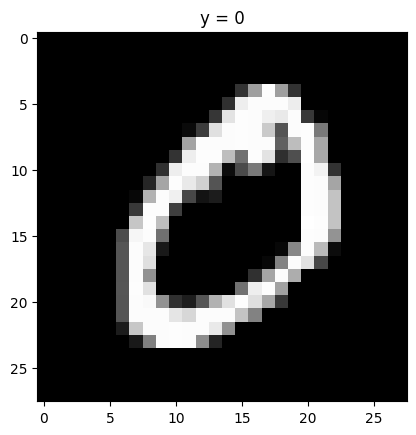

yhat: tensor([0])
probability of class  0.9997114539146423


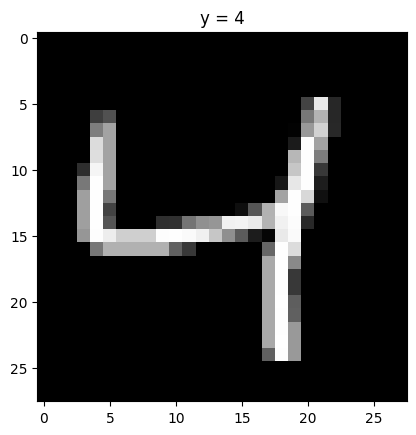

yhat: tensor([4])
probability of class  0.8682875633239746


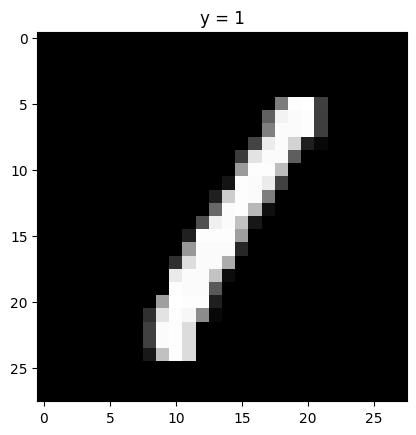

yhat: tensor([1])
probability of class  0.9658814668655396


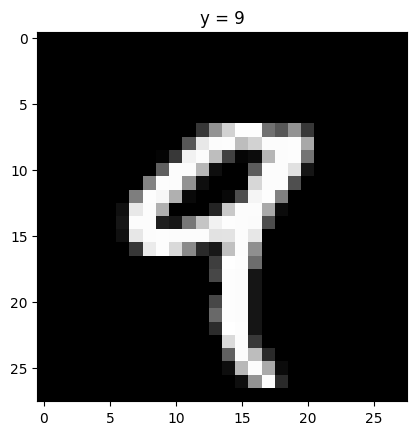

yhat: tensor([9])
probability of class  0.9258382320404053


In [40]:
#plotting the first five correctly classified samples and the probability of that class
Softmax_fn=nn.Softmax(dim=-1)
count = 0
for x, y in validation_dataset:
    z = model(x.reshape(-1, 28 * 28))
    _, yhat = torch.max(z, 1)
    if yhat == y:
        show_data((x, y))
        plt.show()
        print("yhat:", yhat)
        print("probability of class ", torch.max(Softmax_fn(z)).item())
        count += 1
    if count >= 5:
        break  

In [ ]:
#the probability is larger